# HW5 - FTIR Simulation

In [1]:
# imports
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [9, 6]
matplotlib.rcParams['font.size'] = 11
import numpy as np
import scipy
import scipy.constants as spc

### 1
Broadcasting is the term for how numpy treats arrays when doing math. You've already been exposed to broadcasting in previous homeworks. In this question you will learn the concpets involved in broadasting multidimensional arrays. You'll be responsible for knowing how to manipulate arrays in this and future homeworks.

## 1a
Read the general broadcasting rules in the [broadcasting documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html). Create two three dimensional arrays with different shapes and add them together. You may use [np.zeros](http://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) to create multidimensonal arrays. Describe how broadcasting works in your own words. Print the shape of the output array, and describe how that shape corresponds to the shape of the original arrays.

In [2]:
a = np.zeros((1,3,5))
b = np.zeros((2,3,1))
c = a+b
print c.shape

(2L, 3L, 5L)


Instead of taking only arrays of the same dimensions to do calculations element-wise, broadcasting can essentially use the single "scalar" value of a dimension with a single element and operate with that on all elements in the corresponding dimension in the second array.

In my above example, the first and last dimensions of the final array have been determined by broadcasting over the larger dimension in a or b, so for the first dimension 2 and the last dimension 5. The middle dimension already had matching length of 3.

## 1b
Create some arrays that do not broadcast together. Describe why they do not broadcast in your own words.

In [15]:
d = np.zeros((1,3,5))
e = np.zeros((3,3))
f = d+e

ValueError: operands could not be broadcast together with shapes (1,3,5) (3,3) 

These arrays don't broadcast because numpy compares their shapes starting with the trailing dimensions. In this case (comparing 3 and 5) the last dimensions are neither equal nor is one of them equal to 1.

## 1c
Indexing is how you access a subset of an array. You use square brackets to index. Read the basic [indexing documentation](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html), then complete the following. Indexing in python starts from zero so an array of length n has indicies from 0 to n-1.

In [4]:
arr = np.random.random([8, 9, 10])  # an array of random numbers with shape (8, 9, 10)

# take the zeroeth element in the zeroeth dimension, accessing an array of shape (9, 10)
g = arr[0,:,:]
print g.shape

# take the zeroeth element in all 3 dimensions, accessing a single value
h = arr[0,0,0]
print h

# take the zeroeth element in the first dimension, accessing an array of shape (8, 10)
i = arr[:,0,:]
print i.shape

# expand the dimensionality of the array to (8, 1, 9, 10)
j = arr[:,np.newaxis,:,:]
print j.shape


(9L, 10L)
0.967589245823
(8L, 10L)
(8L, 1L, 9L, 10L)


## 1d
Take what you learned above and broadcast the two arrays below into a single array with shape (7, 6). Describe what you've done in your own words.

In [5]:
a = np.arange(6)
b = np.arange(7)
b = b[:,np.newaxis]
c = a+b
print c.shape

(7L, 6L)


Since i want the first dimension of my new array to be 7, I first added a second dimension to b. I then broadcast my arrays, resulting in a shape of (b,a) dimensions.

## 1e
Many numpy methods have optional 'axis' arguments. Describe what I am doing below in your own words.

In [6]:
a = np.zeros([5, 7])
print np.sum(a, axis=0).shape
print np.sum(a, axis=1).shape

(7L,)
(5L,)


Here a 5x7 array filled with zeros is created, then the sum of the array elements is taken over the specified dimension by the axis command. For axis=0, the first dimension is summed, resulting in a 7L array. For axis=1, the second dimension is summed, resulting in a 5L array.

## FTIR simulation

The program below simulates the FTIR spectroscopy of a light source with different spectral distributions. Although the simulation is created for you, it is expected that you will examine it in sufficient depth that you will understand it. In fact, you need to change the parameters because the parameter choice is quite poor. You can get much better and clear results for different choices. The questions will help you discover the important insights into how Fourier transforms work.

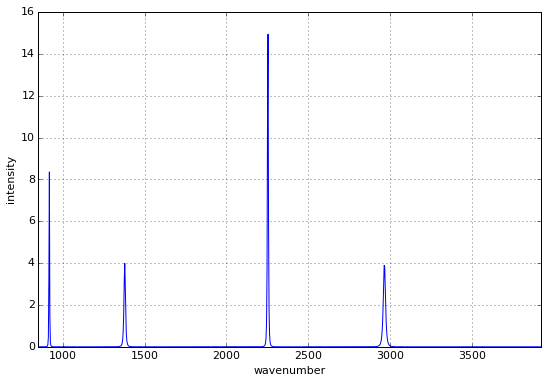

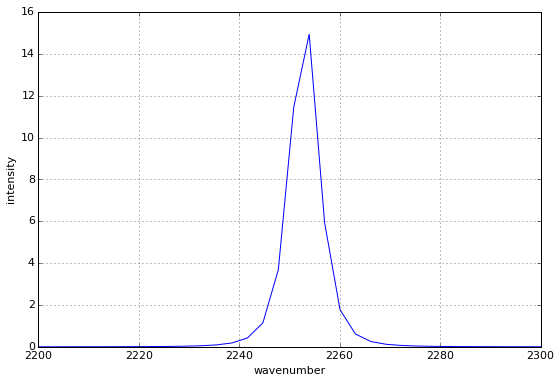

In [7]:
# acetonitrile spectrum simulation

w = np.linspace(850, 3919, 1000)  # wavenumber from 850 to 3919, divided into 1000 steps
k = 2*np.pi*w

# acetonitrile resonance properties
w0 = np.array([917., 1378., 2253., 2965.])  # central frequencies for peaks
Gamma = np.array([3., 8., 5., 12.])  # dephasing rate/peak width
A = np.array([3., 2., 4., 2.])  # amplitude of peaks

E = np.sum((A*Gamma**2)/((w0-w[:, None])**2+(Gamma**2)), axis=1) # electric field
I = E*np.conj(E) # intensity

plt.plot(w, I)
plt.xlim(w.min(), w.max())
plt.grid()
plt.xlabel('wavenumber')
plt.ylabel('intensity')

plt.figure()
plt.plot(w, I)
plt.xlim(2200, 2300)
plt.grid()
plt.xlabel('wavenumber')
plt.ylabel('intensity')

C:\Anaconda\lib\site-packages\numpy\core\numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


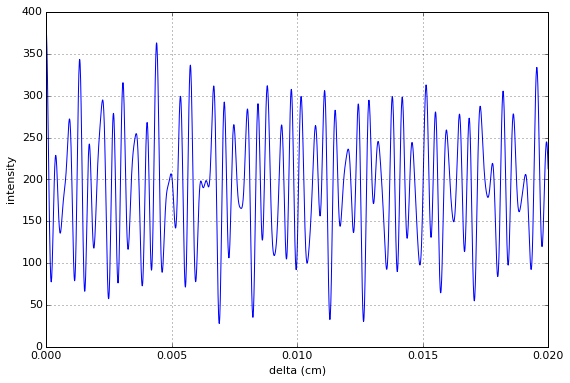

In [8]:
delta = np.linspace(0, 0.02, 2000)  # cm

E_delta = E+E*np.exp(1j*k*delta[:, None])  # (delta, w)

I_delta = E_delta*np.conj(E_delta)
I_net = np.sum(I_delta, axis=1)

plt.plot(delta, I_net)
plt.xlim(delta.min(), delta.max())
plt.grid()
plt.xlabel('delta (cm)')
plt.ylabel('intensity')

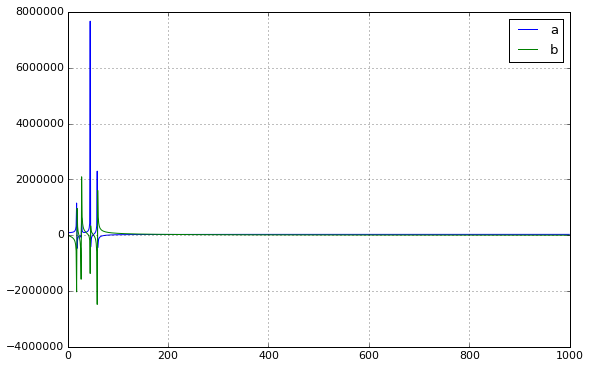

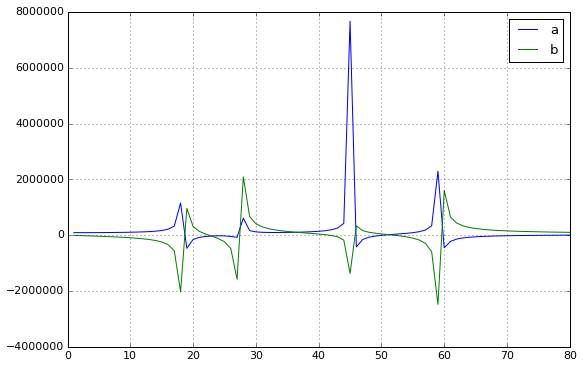

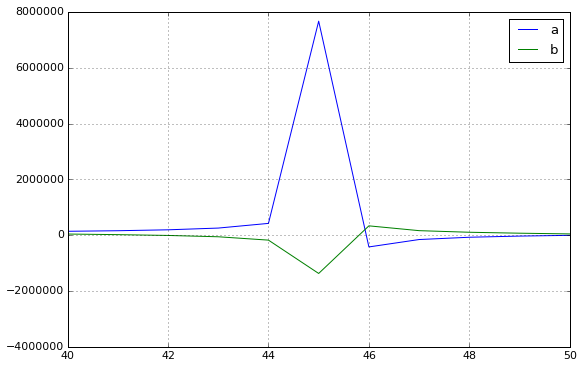

In [9]:
# discrete fourier transform

m = np.arange(1, len(delta)/2)

a = (2/delta.max())*np.sum(I_net*np.cos((2*np.pi*m[:, None]*delta)/(delta.max())), axis=1)
b = (2/delta.max())*np.sum(I_net*np.sin((2*np.pi*m[:, None]*delta)/(delta.max())), axis=1)

plt.plot(m, a)
plt.plot(m, b)
plt.grid()
plt.legend(['a', 'b'])

plt.figure()
plt.plot(m, a)
plt.plot(m, b)
plt.xlim(0, 80)
plt.grid()
plt.legend(['a', 'b'])

plt.figure()
plt.plot(m, a)
plt.plot(m, b)
plt.xlim(40, 50)
plt.grid()
plt.legend(['a', 'b'])

## 2
For a periodic function with period $T$, a Fourier series is defined as

\begin{equation}\Large
f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n \cos(nx) + b_n \sin(nx)
\end{equation}

where

\begin{equation}\Large
a_n = \frac{1}{\pi} \int_{0}^{2 \pi} f(x) \cos(nx) \,\, \mathrm{d}x
\end{equation}

and

\begin{equation}\Large
b_n = \frac{1}{\pi} \int_{0}^{2 \pi} f(x) \sin(nx) \,\, \mathrm{d}x
\end{equation}

Note that the definitions for the coefficents define a period from $0$ to $2 \pi$ since this is the longest period for the functions $\cos(nx)$ and $\sin(nx)$. $n$ must be an integer $\geq 1$ What defines the period for this simulation set and what is the period?

In [10]:
f = w[0]*spc.c*100 # convert to m
period = 1./f
print period

3.92428347292e-14


The period is defined by the longest wavelength that fits in our data interval, so converting that to period gives 3.9e-14.

## 3
There are two sets of spectra on the graph when you do the Fourier series. What do they represent?

The two sets of spectra represent the cosine and sine transforms, respectively.

## 4
Change the x axis in the spectral plots of the Fourier transforms so they read in wavenumber units. Then, compare the measured spectra with the original spectra. You will see the widths of the spectral features are quite different. Why? Do the observed widths from the FTIR agree with what you expect?

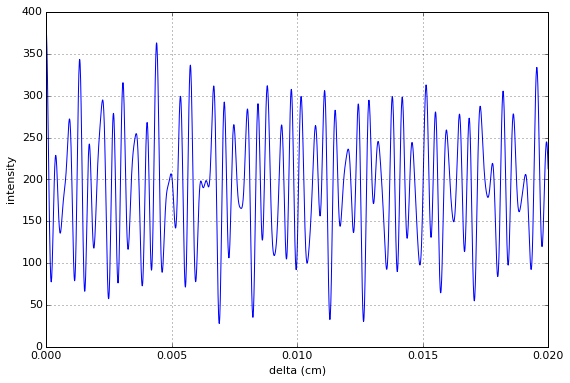

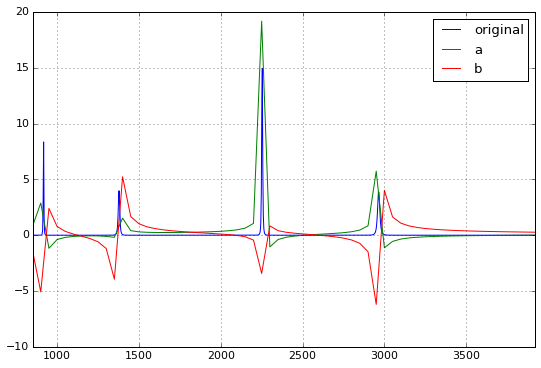

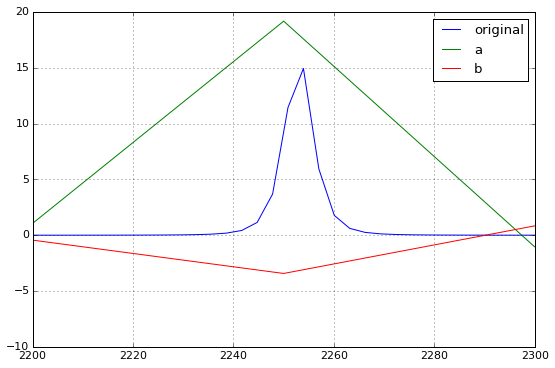

In [11]:
delta = np.linspace(0, 0.02, 2000)  # cm, path length difference (based on translating mirror movement)

E_delta = E+E*np.exp(1j*k*delta[:, None])  # (delta, w)

I_delta = E_delta*np.conj(E_delta)
I_net = np.sum(I_delta, axis=1)

plt.plot(delta, I_net)
plt.xlim(delta.min(), delta.max())
plt.grid()
plt.xlabel('delta (cm)')
plt.ylabel('intensity')

# discrete fourier transform

m = np.arange(1, len(delta)/2)

a = (2/delta.max())*np.sum(I_net*np.cos((2*np.pi*m[:, None]*delta)/(delta.max())), axis=1)/400000
b = (2/delta.max())*np.sum(I_net*np.sin((2*np.pi*m[:, None]*delta)/(delta.max())), axis=1)/400000

wave = m/delta.max()

plt.figure()
plt.plot(w, I)
plt.plot(wave, a)
plt.plot(wave, b)
plt.xlim(850, 3919)
plt.grid()
plt.legend(['original', 'a','b'])

plt.figure()
plt.plot(w, I)
plt.plot(wave, a)
plt.plot(wave, b)
plt.xlim(2200, 2300)
plt.grid()
plt.legend(['original', 'a','b'])

The FTIR spectra has much wider peaks because it is an approximation of the original spectra, and we haven't used a long enough path difference to get good resolution for the peaks.

## 5
Change the parameters in your worksheet so the measurement matches the original spectrum.

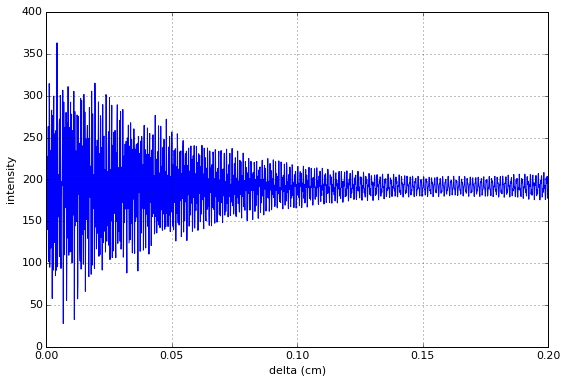

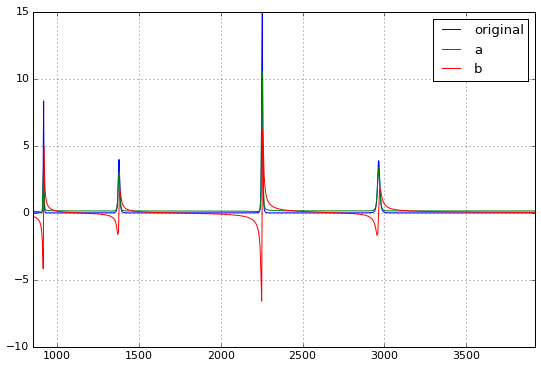

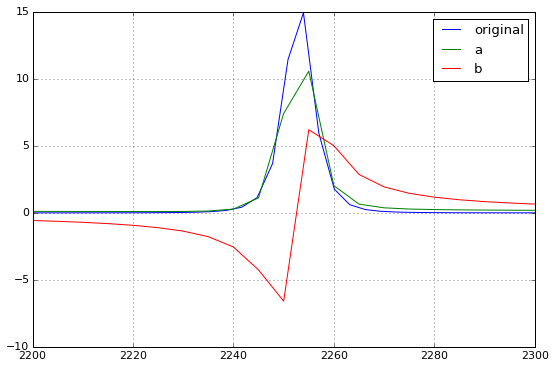

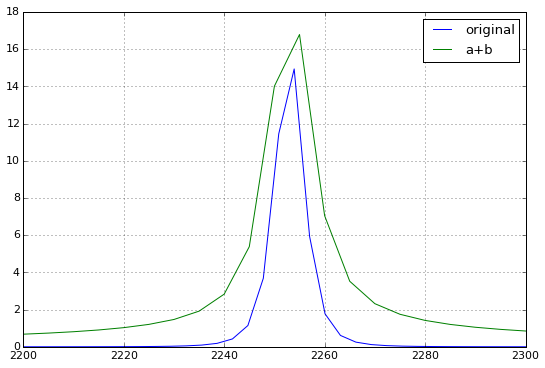

In [12]:
delta = np.linspace(0, 0.2, 2000)  # cm, longer path length

E_delta = E+E*np.exp(1j*k*delta[:, None])  # (delta, w)

I_delta = E_delta*np.conj(E_delta)
I_net = np.sum(I_delta, axis=1)

plt.plot(delta, I_net)
plt.xlim(delta.min(), delta.max())
plt.grid()
plt.xlabel('delta (cm)')
plt.ylabel('intensity')

# discrete fourier transform

m = np.arange(1, len(delta)/2)

a = (2/delta.max())*np.sum(I_net*np.cos((2*np.pi*m[:, None]*delta)/(delta.max())), axis=1)/20000
b = (2/delta.max())*np.sum(I_net*np.sin((2*np.pi*m[:, None]*delta)/(delta.max())), axis=1)/20000

wave = m/delta.max()

plt.figure()
plt.plot(w, I)
plt.plot(wave, a)
plt.plot(wave, b)
plt.xlim(850, 3919)
plt.grid()
plt.legend(['original', 'a','b'])

plt.figure()
plt.plot(w, I)
plt.plot(wave, a)
plt.plot(wave, b)
plt.xlim(2200, 2300)
plt.grid()
plt.legend(['original', 'a','b'])

plt.figure()
plt.plot(w, I)
plt.plot(wave, (abs(a)+abs(b)))
plt.xlim(2200, 2300)
plt.grid()
plt.legend(['original', 'a+b'])

## 6
The Nyquist criterion is an important concept in Fourier transform methods. Change the parameters so the Nyquest criterion is not met for some lines but is met for other lines. Show that the lines for which the criterion is not met change position.

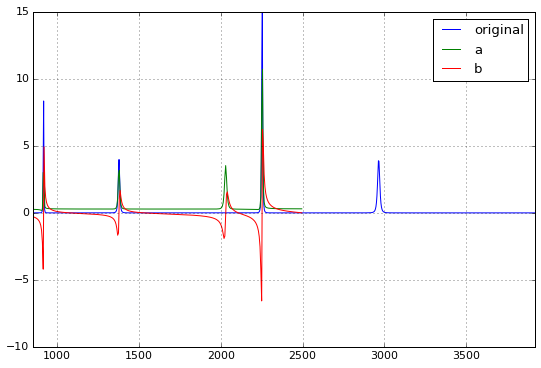

In [13]:
delta = np.linspace(0, 0.2, 1000)  # cm, too few sampling points

E_delta = E+E*np.exp(1j*k*delta[:, None])  # (delta, w)

I_delta = E_delta*np.conj(E_delta)
I_net = np.sum(I_delta, axis=1)

# discrete fourier transform

m = np.arange(1, len(delta)/2)

a = (2/delta.max())*np.sum(I_net*np.cos((2*np.pi*m[:, None]*delta)/(delta.max())), axis=1)/10000
b = (2/delta.max())*np.sum(I_net*np.sin((2*np.pi*m[:, None]*delta)/(delta.max())), axis=1)/10000

wave = m/delta.max()

plt.figure()
plt.plot(w, I)
plt.plot(wave, a)
plt.plot(wave, b)
plt.xlim(850, 3919)
plt.grid()
plt.legend(['original', 'a','b'])

## 7
A transition between two states is described by an exponentially decaying oscillatory function. The following exercise examines the frequency distribution that you would expect, namely a Lorentzian line shape. Graph the function $\sin(2 \pi \nu t) e^{- \Gamma t}$ and its Fourier transform using [numpy's FFT method](http://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html#numpy.fft.fft). Assume $\nu = 5\times10^{13} \,\, \mathrm{s}^{-1}$ and $\Gamma = 10^{12} \,\, \mathrm{s}^{-1}$. Use a time period of 0-4 picoseconds for the function. Create two graphs, one that shows the spectrum at all the frequencies and one that expands the scale to show the line shape of the resonance. Show that the width of the line is related to the time constant of the decay by the uncertainty principle. How will things change if $\Gamma = 3\times10^{12} \,\, \mathrm{s}^{-1}$.

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: divide by zero encountered in divide
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in divide
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: divide by zero encountered in divide
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: divide by zero encountered in divide
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: divide by zero encountered in divide
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:23: RuntimeWarning: divide by zero encountered in divide
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:28: RuntimeWarning: divide by zero encountered in divide
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: divide by zero encountered in divide
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:30: RuntimeWarning: divide by zero encountered in divide
C:\Anaconda\lib\sit

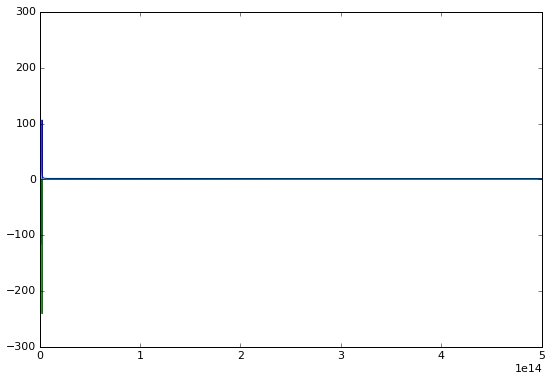

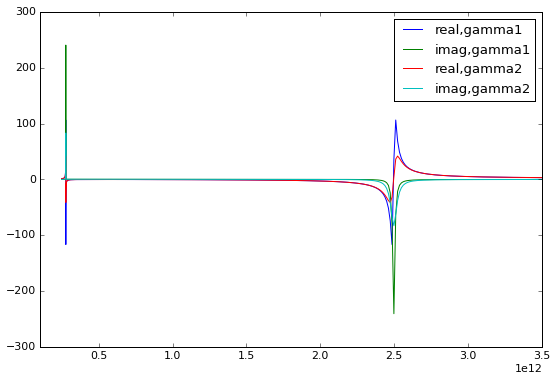

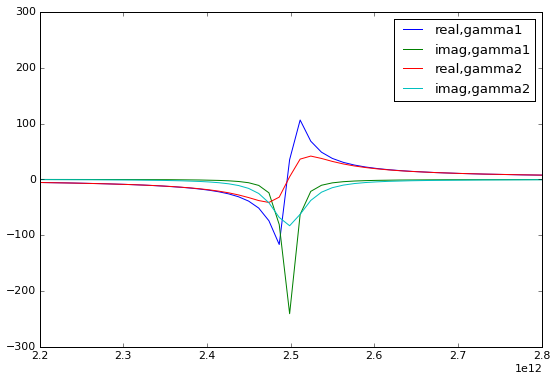

In [14]:
t = np.linspace(0.0,4.0,2000)
t = t*1.0e-12
nu = 5.0e13
gamma = 1.0e12
gamma2 = 3.0e12

f = np.sin(2*np.pi*nu*t)*np.exp(-gamma*t)
f_fft = np.fft.fft(f)
f_real = np.real(f_fft)
f_imag = np.imag(f_fft)
f2 = np.sin(2*np.pi*nu*t)*np.exp(-gamma2*t)
f_fft2 = np.fft.fft(f2)
f_real2 = np.real(f_fft2)
f_imag2 = np.imag(f_fft2)

plt.plot(1/t,f_real)
plt.plot(1/t,f_imag)

plt.figure()
plt.plot(1/t,f_real)
plt.plot(1/t,f_imag)
plt.plot(1/t,f_real2)
plt.plot(1/t,f_imag2)
plt.xlim(1e11,3.5e12)
plt.legend(['real,gamma1','imag,gamma1','real,gamma2','imag,gamma2'])

plt.figure()
plt.plot(1/t,f_real)
plt.plot(1/t,f_imag)
plt.plot(1/t,f_real2)
plt.plot(1/t,f_imag2)
plt.xlim(2.2e12,2.8e12)
plt.legend(['real,gamma1','imag,gamma1','real,gamma2','imag,gamma2'])

When we use a small time constant (gamma1, $\Gamma = 10^{12} \,\, \mathrm{s}^{-1}$) the time broadens (more uncertainty in t), and the width of the peak in the frequency domain becomes narrower. When we increase the time constant (gamma2, $\Gamma = 3\times10^{12} \,\, \mathrm{s}^{-1}$), the frequency peak broadens.